## Observations and Insights 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [115]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_ms_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_ms_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice in the DataFrame.
print(f"The number of unique mice in the dataset is: {combined_ms_data['Mouse ID'].nunique()}")
print(f"The number of total mice listed in the datast is: {combined_ms_data['Mouse ID'].count()}")

The number of unique mice in the dataset is: 249
The number of total mice listed in the datast is: 1893


In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_ms_data[combined_ms_data.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice_id["Mouse ID"].unique())

['g989']


In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_ms_data.drop_duplicates(["Mouse ID", "Timepoint"], keep = "first")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of unique mice in the dataset is: {clean_df['Mouse ID'].nunique()}")
print(f"The number of total mice listed in the datast is: {clean_df['Mouse ID'].count()}")
new_total = combined_ms_data['Mouse ID'].count() - clean_df['Mouse ID'].count()
print(f"The difference in total listed mice is {new_total}")

The number of unique mice in the dataset is: 249
The number of total mice listed in the datast is: 1888
The difference in total listed mice is 5


## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_reg_df = clean_df.groupby("Drug Regimen")

drug_reg_avg = drug_reg_df["Tumor Volume (mm3)"].mean()
drug_reg_median = drug_reg_df["Tumor Volume (mm3)"].median()
drug_reg_var = drug_reg_df["Tumor Volume (mm3)"].var()
drug_reg_std_dev = drug_reg_df["Tumor Volume (mm3)"].std()
drug_reg_sem = drug_reg_df["Tumor Volume (mm3)"].sem()

drug_reg_df = pd.DataFrame({"Mean": drug_reg_avg,
                           "Median": drug_reg_median,
                           "Variance": drug_reg_var,
                           "Std Dev": drug_reg_std_dev,
                           "SEM": drug_reg_sem
                           })
drug_reg_df.head()

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
drug_reg_oneliner = clean_df.groupby("Drug Regimen")
drug_reg_oneliner = drug_reg_oneliner["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_reg_oneliner.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

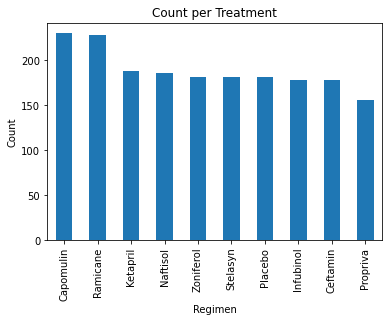

In [77]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimen_bar = clean_df["Drug Regimen"].value_counts()
regimen_bar.plot(kind="bar", title= "Count per Treatment")

plt.xlabel("Regimen")
plt.ylabel("Count")
plt.show()

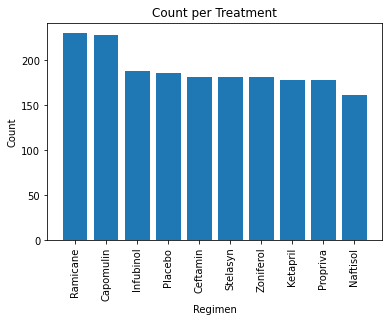

In [81]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(regimen_bar))
y_axis = combined_ms_data["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
tick_locations = [value for value in x_axis]
drug_unique= clean_df["Drug Regimen"].unique()
plt.xticks(tick_locations, drug_unique, rotation="vertical")
plt.xlabel("Regimen")
plt.ylabel("Count")
plt.title("Count per Treatment")
plt.show()

## Pie Plots

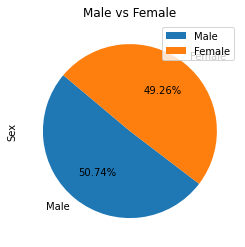

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = pd.DataFrame(clean_df["Sex"].value_counts())
gender_pie.plot(kind="pie", y="Sex",title = "Male vs Female", autopct="%.2f%%", startangle=140)

<ipython-input-112-6c631ee53783>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_pie_py, labels = labels, autopct="%.2f%%", startangle=140)


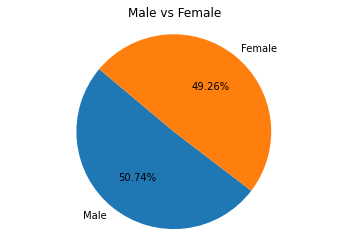

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie_py = pd.DataFrame(clean_df["Sex"].value_counts())
labels = gender_pie_py.index.values
plt.pie(gender_pie_py, labels = labels, autopct="%.2f%%", startangle=140)
plt.title("Male vs Female")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [227]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

top_treatments= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
best_treatment = clean_df[clean_df["Drug Regimen"].isin(top_treatments)]
best_treatment = best_treatment.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
quartiles = best_treatment.quantile([.25,.5,.75])


for drug in top_treatments:
    quartiles = best_treatment[drug].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    iqr = round(upperq-lowerq, 2)
    median = round(quartiles[0.5], 2)
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile for {drug} range is: {iqr}")
    print(f"The the median for {drug} is: {median} ")
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    
outlier_info = best_treatment.loc[(best_treatment < lower_bound) | (best_treatment > upper_bound)]
outlier_info.head()

The lower quartile for Capomulin is: 32.38
The upper quartile for Capomulin is: 40.16
The interquartile for Capomulin range is: 7.78
The the median for Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

The lower quartile for Ramicane is: 31.56
The upper quartile for Ramicane is: 40.66
The interquartile for Ramicane range is: 9.1
The the median for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

The lower quartile for Infubinol is: 54.05
The upper quartile for Infubinol is: 65.53
The interquartile for Infubinol range is: 11.48
The the median for Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

The lower quartile for Ceftamin is: 48.72
The upper quartile for Ceftamin is: 64.3
The interquartile for Ceftamin range is: 15.58
The the median for Ceftamin is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.



Drug Regimen  Mouse ID
Capomulin     s185        23.343598
Ramicane      k403        22.050126
Name: Tumor Volume (mm3), dtype: float64

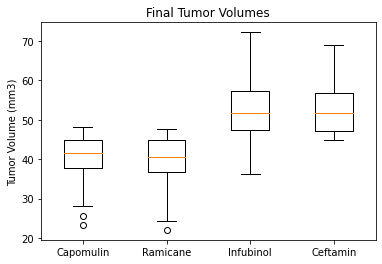

In [248]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


capomulin_plot=combined_ms_data.loc[(combined_ms_data["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
ramicane_plot=combined_ms_data.loc[(combined_ms_data["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
infubinol_plot=combined_ms_data.loc[(combined_ms_data["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
ceftamin_plot=combined_ms_data.loc[(combined_ms_data["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]

data = [capomulin_plot.dropna(), ramicane_plot.dropna(), infubinol_plot.dropna(), ceftamin_plot.dropna()]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Final Tumor Volumes")
x_ticks = [1,2,3,4]
plt.xticks(x_ticks,["Capomulin", "Ramicane", "Infubinol","Ceftamin"])
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [241]:
capomulin_df = combined_ms_data[combined_ms_data["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


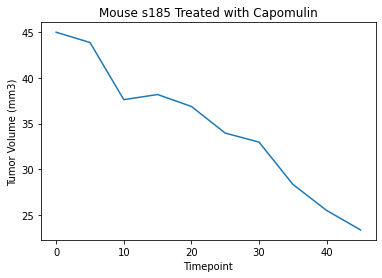

In [276]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = combined_ms_data[combined_ms_data["Mouse ID"] == "s185"]
s185_df
plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Treated with Capomulin")
plt.show()

In [285]:
capomulin_weight_vol_df = capomulin_df.groupby("Mouse ID")
weight= capomulin_weight_vol_df["Weight (g)"].first()
volume= capomulin_weight_vol_df["Tumor Volume (mm3)"].mean()
capomulin_weight_vol_df= pd.DataFrame({"Volume": volume,
                                      "Weight": weight})
capomulin_weight_vol_df.head()

,Volume,Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


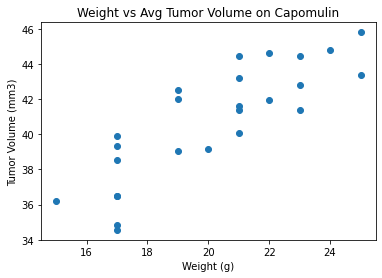

In [290]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_weight_vol_df["Weight"], capomulin_weight_vol_df["Volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Volume on Capomulin")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume is 0.84


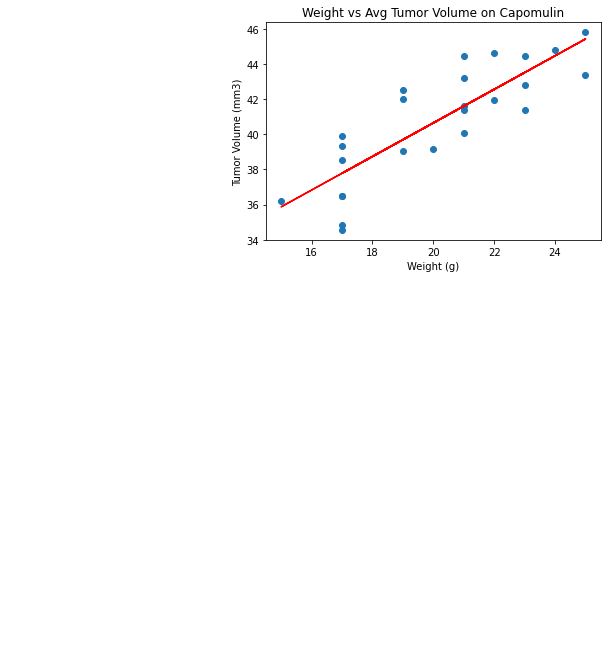

In [293]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
new_weight = capomulin_weight_vol_df["Weight"]
new_volume = capomulin_weight_vol_df["Volume"]
correlation= st.pearsonr(weight, volume)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values= weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Volume on Capomulin")
plt.show()